In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline 

import os
import subprocess
import sys
import shutil

import codecs

In [2]:
from libraryIR import *
path_to_pool = "C:\\Users\\alvis\\Desktop\\Reperimento_dell_Informazione\\Project\\terrier-core-4.2\\share\\TIPSTER\\pool\\qrels.trec7.txt"     

# Plot Random Systems Utilities


In [11]:
def plot_RandSys(randSys_dic, rf_list):
    keys = randSys_dic.keys()
    x = [] + keys
    y = {}
    for cl in rf_list:
        y[cl] = list()

    for i in range(1, len(keys) + 1):
        for cl in rf_list:
            y[cl].append(randSys_dic[i][cl])
      
    colors = ["r","g", "b", "c", "k", "y"]
    plt.rcParams["figure.figsize"] = [12, 8]   
    plt.xlabel("Number of randomly chosen input systems")
    plt.ylabel("Mean Average Precision")
    plt.title("TREC 4: Combining random sets of systems")
    for i in range(len(rf_list)):
        plt.plot(x, y[rf_list[i]], colors[i] + "--")
    plt.legend([s.replace(".txt", "") for s in rf_list])
    plt.show()

### We execute different Comb algorithms on a random set of systems and we progressively increased the number of systems used

In [17]:
path = "C:\\Users\\alvis\\Desktop\\Reperimento_dell_Informazione\\Project\\temp"     
dir_in = "input"   
dir_w = "weights"       
dir_norm = "norm"
dir_comb = "comb"

filename_list = listFiles(path, dir_norm)
np.random.seed(seed = 1156818)
combList = "comb_anz.txt", "comb_max.txt", "comb_median.txt", "comb_min.txt", "comb_mnz.txt", "comb_sum.txt"
results = {}
        

for i in range(1, len(filename_list) + 1, 1):   
    if(i <= 5):
        repeat = 1
    else:
        repeat = 1
        
    results[i] = {"comb_anz.txt":0,"comb_max.txt":0,"comb_median.txt":0,"comb_min.txt":0, "comb_mnz.txt":0,"comb_sum.txt":0}
    for j in range(0, repeat, 1):
        perm = np.random.permutation(filename_list)[0:i]
        print "Ripetizione numero: "+ str(j)
        comb_anz(perm, path, dir_norm, dir_comb)
        comb_min(perm, path, dir_norm, dir_comb)
        comb_median(perm, path, dir_norm, dir_comb)
        comb_sum(perm, path, dir_norm, dir_comb)
        comb_mnz(perm, path, dir_norm, dir_comb)
        comb_max(perm, path, dir_norm, dir_comb)
        for filename in combList:
            MAP = take_MAP(path, dir_comb, dir_w, filename, False)
            results[i][filename] += MAP
    #calculate mean   
    for filename in combList:
        results[i][filename] = results[i][filename] / repeat
    #results[i]["condorcetWeighted.txt"]=results[i]["condorcetWeighted.txt"]/repeat

1
Ripetizione numero: 0
2
Ripetizione numero: 0
3
Ripetizione numero: 0
4
Ripetizione numero: 0
5
Ripetizione numero: 0
6
Ripetizione numero: 0
7
Ripetizione numero: 0
8
Ripetizione numero: 0
9
Ripetizione numero: 0
10
Ripetizione numero: 0


In [13]:
#results = {1: {'comb_min.txt': 0.0727569170341, 'comb_anz.txt': 0.0727569170341, 'comb_median.txt': 0.0727569170341, 'comb_max.txt': 0.0727569170341, 'comb_mnz.txt': 0.0727569170341, 'comb_sum.txt': 0.0727569170341}, 2: {'comb_min.txt': 0.0772871378348, 'comb_anz.txt': 0.0772209399826, 'comb_median.txt': 0.0772209399826, 'comb_max.txt': 0.07528196801, 'comb_mnz.txt': 0.077474116713, 'comb_sum.txt': 0.077474116713}, 3: {'comb_min.txt': 0.0712742651261, 'comb_anz.txt': 0.0728166572468, 'comb_median.txt': 0.0730704233088, 'comb_max.txt': 0.0703324583026, 'comb_mnz.txt': 0.0734916280921, 'comb_sum.txt': 0.0734916280921}, 4: {'comb_min.txt': 0.0701295597452, 'comb_anz.txt': 0.0731400242455, 'comb_median.txt': 0.072923723292, 'comb_max.txt': 0.07015388364, 'comb_mnz.txt': 0.0769665469222, 'comb_sum.txt': 0.0769598374628}, 5: {'comb_min.txt': 0.0709782028789, 'comb_anz.txt': 0.0742496331777, 'comb_median.txt': 0.0732140921497, 'comb_max.txt': 0.0704736768258, 'comb_mnz.txt': 0.0760495669495, 'comb_sum.txt': 0.0760150113935}, 6: {'comb_min.txt': 0.0658299167735, 'comb_anz.txt': 0.075091137224, 'comb_median.txt': 0.0734869059678, 'comb_max.txt': 0.0726304727012, 'comb_mnz.txt': 0.0776347964318, 'comb_sum.txt': 0.0776357901853}, 7: {'comb_min.txt': 0.0671424210036, 'comb_anz.txt': 0.0762197789378, 'comb_median.txt': 0.0745964287798, 'comb_max.txt': 0.0726212325262, 'comb_mnz.txt': 0.0779996294879, 'comb_sum.txt': 0.0780430701728}, 8: {'comb_min.txt': 0.0664047327925, 'comb_anz.txt': 0.0762354538801, 'comb_median.txt': 0.0750707826144, 'comb_max.txt': 0.0726692573249, 'comb_mnz.txt': 0.0787470875651, 'comb_sum.txt': 0.0787522512652}, 9: {'comb_min.txt': 0.0671493402524, 'comb_anz.txt': 0.0762039600671, 'comb_median.txt': 0.0747629549949, 'comb_max.txt': 0.0727033202115, 'comb_mnz.txt': 0.0777515970927, 'comb_sum.txt': 0.0777846434396}, 10: {'comb_min.txt': 0.0671863866897, 'comb_anz.txt': 0.0764415443893, 'comb_median.txt': 0.0748769445362, 'comb_max.txt': 0.0727252889073, 'comb_mnz.txt': 0.0781664613426, 'comb_sum.txt': 0.0781900029676}}

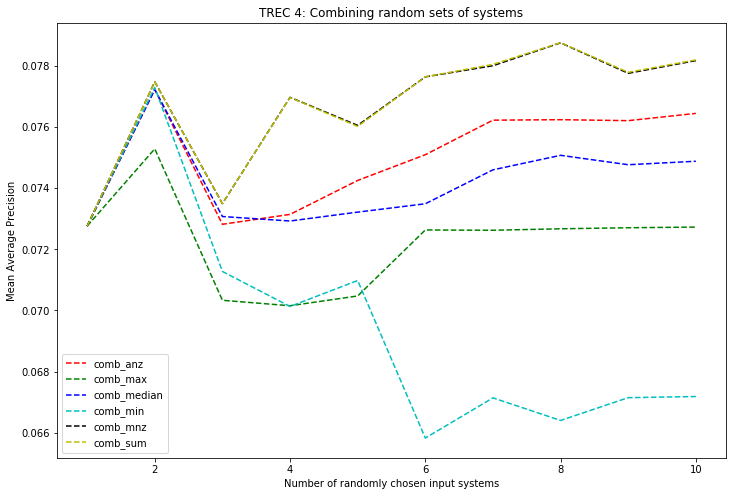

In [14]:
combList = "comb_anz.txt", "comb_max.txt", "comb_median.txt", "comb_min.txt", "comb_mnz.txt", "comb_sum.txt"
plot_RandSys(results, combList)

### We execute Condorcet, Condorcet Weighted,CondorcetML, CondorcetLog on a random set of systems and we progressively increased the number of systems used

In [ ]:
path = "C:\\Users\\DavideDP\\AnacondaProjects\\Project\\RankFusion"     
dir_in = "input"   
dir_w = "weights"     
dir_w_ml = "weights_ml"
dir_w_log = "weights_log"
dir_norm = "norm"
dir_comb = "comb"

filename_list = listFiles(path, dir_norm)
np.random.seed(seed=1156818)
results = {}
        
for i in range(1, len(filename_list) + 1, 1):
    repeat = 1
    
    results[i]={"condorcet.txt":0,"condorcetWeighted.txt":0,"condorcetML.txt":0,"condorcetLog.txt":0}
    for j in range(0, repeat, 1):
        perm = np.random.permutation(filename_list)[0:i]
        print "Ripetizione numero: " + str(j)
        condorcet_alg(perm, path, dir_norm, dir_comb)
        MAP = take_MAP(path, dir_comb, dir_w, "condorcet.txt", False)
        results[i]["condorcet.txt"] += MAP
        
        condorcet_weighted(perm, path, dir_norm, dir_comb, dir_w)
        MAP = take_MAP(path, dir_comb, dir_w, "condorcetWeighted.txt", False)
        results[i]["condorcetWeighted.txt"] += MAP
        
        condorcet_weighted(perm, path, dir_norm, dir_comb, dir_w_ml, "condorcetML.txt")
        MAP = take_MAP(path, dir_comb, dir_w, "condorcetML.txt", False)
        results[i]["condorcetML.txt"] += MAP
        
        condorcet_weighted(perm, path, dir_norm, dir_comb, dir_w_log, "condorcetLog.txt")
        MAP = take_MAP(path, dir_comb, dir_w, "condorcetLog.txt", False)
        results[i]["condorcetLog.txt"] += MAP        
    #calculate mean   
    results[i]["condorcet.txt"] = results[i]["condorcet.txt"] / repeat
    results[i]["condorcetWeighted.txt"] = results[i]["condorcetWeighted.txt"] / repeat
    results[i]["condorcetML.txt"] = results[i]["condorcetML.txt"] / repeat
    results[i]["condorcetLog.txt"] = results[i]["condorcetLog.txt"] / repeat

In [7]:
#results = {1: {'condorcet.txt': 0.07279490096225999, 'condorcetML.txt': 0.07279490096225999, 'condorcetWeighted.txt': 0.07279490096225999, 'condorcetLog.txt': 0.07279490096225999}, 2: {'condorcet.txt': 0.07335329191174, 'condorcetML.txt': 0.07607955962968001, 'condorcetWeighted.txt': 0.07749542777228, 'condorcetLog.txt': 0.07607955962968001}, 3: {'condorcet.txt': 0.07822214922924, 'condorcetML.txt': 0.07717030913264, 'condorcetWeighted.txt': 0.07822295138344, 'condorcetLog.txt': 0.07684903312402}, 4: {'condorcet.txt': 0.07664187804744, 'condorcetML.txt': 0.07591676389386001, 'condorcetWeighted.txt': 0.07881017267824, 'condorcetLog.txt': 0.07692511873044}, 5: {'condorcet.txt': 0.07789801266368, 'condorcetML.txt': 0.07559469191816, 'condorcetWeighted.txt': 0.07792408646638, 'condorcetLog.txt': 0.07759052047414}, 6: {'condorcet.txt': 0.07656936111664, 'condorcetML.txt': 0.07578351905496, 'condorcetWeighted.txt': 0.0774978049343, 'condorcetLog.txt': 0.07673877153374001}, 7: {'condorcet.txt': 0.0769312576787, 'condorcetML.txt': 0.0771856082104, 'condorcetWeighted.txt': 0.0769828324285, 'condorcetLog.txt': 0.0765880398812}, 8: {'condorcet.txt': 0.0772022041421, 'condorcetML.txt': 0.0771161272812, 'condorcetWeighted.txt': 0.0777630464024, 'condorcetLog.txt': 0.0764970520179}, 9: {'condorcet.txt': 0.0774838978496, 'condorcetML.txt': 0.077071037248, 'condorcetWeighted.txt': 0.0774833883571, 'condorcetLog.txt': 0.0773375766255}, 10: {'condorcet.txt': 0.0773008751011, 'condorcetML.txt': 0.0757877889574, 'condorcetWeighted.txt': 0.0776884978095, 'condorcetLog.txt': 0.0769113355891}}

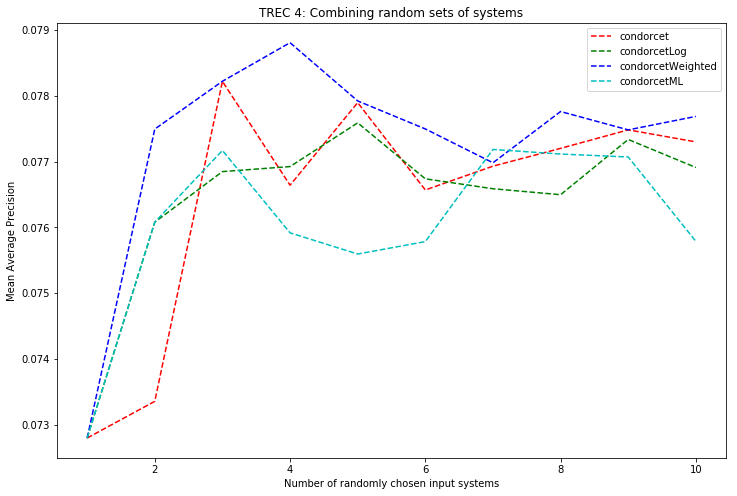

In [8]:
condList = "condorcet.txt", "condorcetLog.txt", "condorcetWeighted.txt", "condorcetML.txt"
plot_RandSys(results, condList)

### We execute Condorcet,Condorcet Weighted,Comb MNZ e Comb Median on a random set of system and we progressively increased the number of system used

In [ ]:
path = "C:\\Users\\DavideDP\\AnacondaProjects\\Project\\RankFusion"     
dir_in = "input"   
dir_w = "weights"       
dir_norm = "norm"
dir_comb = "comb"

filename_list = listFiles(path, dir_norm)
np.random.seed(seed = 1156818)
combList = "condorcet.txt","condorcetWeighted.txt",'comb_mnz.txt','comb_median.txt'
results = {}

for i in range(1,len(filename_list)+1,1):   
    repeat=1
        
    results[i] = {"condorcet.txt":0,"condorcetWeighted.txt":0,'comb_mnz.txt':0,'comb_median.txt':0}
    for j in range(0, repeat, 1):
        perm = np.random.permutation(filename_list)[0:i]
        print "Ripetizione numero: "+str(j)
        condorcet_alg(perm, path, dir_norm, dir_comb)
        condorcet_weighted(perm, path, dir_norm, dir_comb, dir_w)
        comb_mnz(perm, path, dir_norm, dir_comb)
        comb_median(perm, path, dir_norm, dir_comb)
        for filename in combList:
            MAP = take_MAP(path, dir_comb, dir_w, filename, False)
            results[i][filename] += MAP
    #calculate mean
    for filename in combList:
        results[i][filename] = results[i][filename] / repeat
    #results[i]["condorcetWeighted.txt"]=results[i]["condorcetWeighted.txt"]/repeat

In [9]:
#results = {1: {'condorcet.txt': 0.07279490096225999, 'comb_median.txt': 0.07279564593502, 'condorcetWeighted.txt': 0.07279490096225999, 'comb_mnz.txt': 0.07279564593502}, 2: {'condorcet.txt': 0.07335329191174, 'comb_median.txt': 0.07639875270928, 'condorcetWeighted.txt': 0.07749542777228, 'comb_mnz.txt': 0.0780066913558}, 3: {'condorcet.txt': 0.07822214922924, 'comb_median.txt': 0.07719588007539999, 'condorcetWeighted.txt': 0.07822295138344, 'comb_mnz.txt': 0.0784741379245}, 4: {'condorcet.txt': 0.07664187804744, 'comb_median.txt': 0.07603858120536, 'condorcetWeighted.txt': 0.07881017267824, 'comb_mnz.txt': 0.0781589924396}, 5: {'condorcet.txt': 0.07789801266368, 'comb_median.txt': 0.07614118288706, 'condorcetWeighted.txt': 0.07792408646638, 'comb_mnz.txt': 0.07852133107844}, 6: {'condorcet.txt': 0.07656936111664, 'comb_median.txt': 0.07540701334528001, 'condorcetWeighted.txt': 0.0774978049343, 'comb_mnz.txt': 0.07810390216344001}, 7: {'condorcet.txt': 0.0775107357839, 'comb_median.txt': 0.07498347782687499, 'condorcetWeighted.txt': 0.077541602026475, 'comb_mnz.txt': 0.0781322042558}, 8: {'condorcet.txt': 0.07727238075793334, 'comb_median.txt': 0.07485960345249999, 'condorcetWeighted.txt': 0.0781461490214, 'comb_mnz.txt': 0.0781924870193}, 9: {'condorcet.txt': 0.0775013146808, 'comb_median.txt': 0.0745924995917, 'condorcetWeighted.txt': 0.07753135218769999, 'comb_mnz.txt': 0.0780416311572}, 10: {'condorcet.txt': 0.0772290659617, 'comb_median.txt': 0.0748769445362, 'condorcetWeighted.txt': 0.0775739636519, 'comb_mnz.txt': 0.0781664613426}}

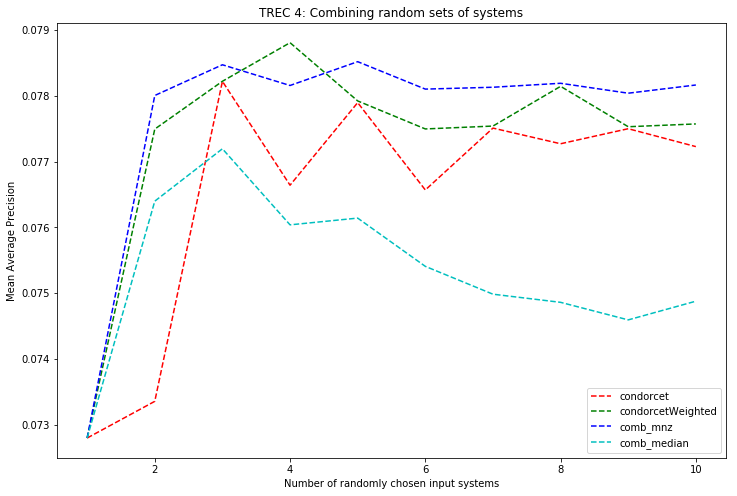

In [10]:
condcombList = "condorcet.txt", "condorcetWeighted.txt", "comb_mnz.txt", "comb_median.txt"
plot_RandSys(results, condcombList)